## Code used to generate community and functional profile data

#### Below is the code that was used to run MetaPhlAn and HUMAnN on each of the samples 

In [ ]:
# Example metaphlan script for community profiling:
sudo cwl-runner ./Chiron/pipelines/strainphlan/metaphlan2.cwl --input_file ./Data/SRS011452/SRS011452.denovo_duplicates_marked.trimmed.1.fastq --input_type fastq --num_cores 4 --seq_prefix SRS011452_1

In [ ]:
# Example humann2 script for functional profiling:
sudo cwl-runner ./Chiron/pipelines/humann2/humann2_complete.cwl --input_file ./Data/SRS018656/SRS018656.denovo_duplicates_marked.trimmed.1.fastq --num_cores 4

# Merge and Normalize humann2 output
sudo cwl-runner ./Chiron/pipelines/humann2/humann2_join_complete.cwl --input_dir ./Data/CRC/ --file_name genefamilies 

# Attach EC names to features
sudo cwl-runner ./Chiron/pipelines/humann2/humann2_rename_table.cwl --input ./Data/CRC/merged_genefamilies.tsv --output CRC --names “ec”

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Community Profiling

In [2]:
#Load and combine community profile data for healthy individuals
N1 = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\Normal\SRS011452_1_profile.txt', sep='\t')
N1.rename(columns = {'#SampleID':'Sample'}, inplace = True)

#Separate out clades into their own columns
N1[['Kingdom','Phylum','Class','Order','Family','Genus','Species','t']] = N1.Sample.str.split("|", expand=True,)
N1['Sample'] = 'SRS011452'
N1 = N1.fillna(value=np.nan)

N2 = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\Normal\SRS016203_2_profile.txt', sep='\t')
N2.rename(columns = {'#SampleID':'Sample'}, inplace = True)
N2[['Kingdom','Phylum','Class','Order','Family','Genus','Species','t']] = N2.Sample.str.split("|", expand=True,)
N2['Sample'] = 'SRS016203'
N2 = N2.fillna(value=np.nan)

N3 = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\Normal\SRS018656_1_profile.txt', sep='\t')
N3.rename(columns = {'#SampleID':'Sample'}, inplace = True)
N3[['Kingdom','Phylum','Class','Order','Family','Genus','Species','t']] = N3.Sample.str.split("|", expand=True,)
N3['Sample'] = 'SRS018656'
N3 = N3.fillna(value=np.nan)

Normal_profile = pd.concat([N1, N2, N3], axis=0).reset_index()
Normal_profile.head()

,index,Sample,Metaphlan2_Analysis,Kingdom,Phylum,Class,Order,Family,Genus,Species,t
0,0,SRS011452,100.00000,k__Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SRS011452,89.48848,k__Bacteria,p__Bacteroidetes,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SRS011452,9.86470,k__Bacteria,p__Firmicutes,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SRS011452,0.53142,k__Bacteria,p__Proteobacteria,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SRS011452,0.11541,k__Bacteria,p__Actinobacteria,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Load and combine community profile data for Japanese CRC patients
CRC1 = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\CRC_J\DRR127476_profile.txt', sep='\t')
CRC1.rename(columns = {'#SampleID':'Sample'}, inplace = True)
CRC1[['Kingdom','Phylum','Class','Order','Family','Genus','Species','t']] = CRC1.Sample.str.split("|", expand=True,)
CRC1['Sample'] = 'DRR127476'
CRC1 = CRC1.fillna(value=np.nan)

CRC2 = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\CRC_J\DRR127478_profile.txt', sep='\t')
CRC2.rename(columns = {'#SampleID':'Sample'}, inplace = True)
CRC2[['Kingdom','Phylum','Class','Order','Family','Genus','Species','t']] = CRC2.Sample.str.split("|", expand=True,)
CRC2['Sample'] = 'DRR127478'
CRC2 = CRC2.fillna(value=np.nan)

CRC3 = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\CRC_J\DRR127485_profile.txt', sep='\t')
CRC3.rename(columns = {'#SampleID':'Sample'}, inplace = True)
CRC3[['Kingdom','Phylum','Class','Order','Family','Genus','Species','t']] = CRC3.Sample.str.split("|", expand=True,)
CRC3['Sample'] = 'DRR127485'
CRC3 = CRC3.fillna(value=np.nan)

CRCJ_profile = pd.concat([CRC1, CRC2, CRC3], axis=0).reset_index()
CRCJ_profile.head()

,index,Sample,Metaphlan2_Analysis,Kingdom,Phylum,Class,Order,Family,Genus,Species,t
0,0,DRR127476,99.96772,k__Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,DRR127476,0.03228,k__Archaea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,DRR127476,50.23446,k__Bacteria,p__Firmicutes,NaN,NaN,NaN,NaN,NaN,NaN
3,3,DRR127476,29.48949,k__Bacteria,p__Bacteroidetes,NaN,NaN,NaN,NaN,NaN,NaN
4,4,DRR127476,17.83064,k__Bacteria,p__Proteobacteria,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Load and combine community profile data for German CRC patients
CRC1 = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\CRC\ERR2726404_1_profile.txt', sep='\t')
CRC1.rename(columns = {'#SampleID':'Sample'}, inplace = True)
CRC1[['Kingdom','Phylum','Class','Order','Family','Genus','Species','t']] = CRC1.Sample.str.split("|", expand=True,)
CRC1['Sample'] = 'ERR2726404'
CRC1 = CRC1.fillna(value=np.nan)

CRC2 = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\CRC\ERR2726409_1_profile.txt', sep='\t')
CRC2.rename(columns = {'#SampleID':'Sample'}, inplace = True)
CRC2[['Kingdom','Phylum','Class','Order','Family','Genus','Species','t']] = CRC2.Sample.str.split("|", expand=True,)
CRC2['Sample'] = 'ERR2726409'
CRC2 = CRC2.fillna(value=np.nan)

CRC3 = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\CRC\ERR2726419_1_profile.txt', sep='\t')
CRC3.rename(columns = {'#SampleID':'Sample'}, inplace = True)
CRC3[['Kingdom','Phylum','Class','Order','Family','Genus','Species','t']] = CRC3.Sample.str.split("|", expand=True,)
CRC3['Sample'] = 'ERR2726419'
CRC3 = CRC3.fillna(value=np.nan)

CRC_profile = pd.concat([CRC1, CRC2, CRC3], axis=0).reset_index()
CRC_profile.head()

,index,Sample,Metaphlan2_Analysis,Kingdom,Phylum,Class,Order,Family,Genus,Species,t
0,0,ERR2726404,100.00000,k__Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ERR2726404,61.98142,k__Bacteria,p__Firmicutes,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ERR2726404,27.84014,k__Bacteria,p__Bacteroidetes,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ERR2726404,5.12030,k__Bacteria,p__Actinobacteria,NaN,NaN,NaN,NaN,NaN,NaN
4,4,ERR2726404,5.05815,k__Bacteria,p__Proteobacteria,NaN,NaN,NaN,NaN,NaN,NaN


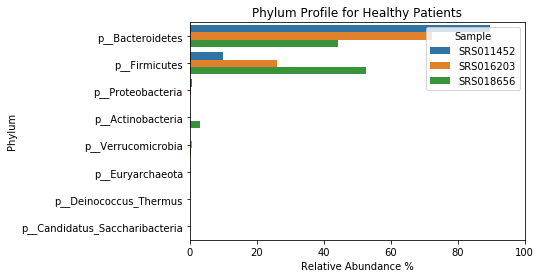

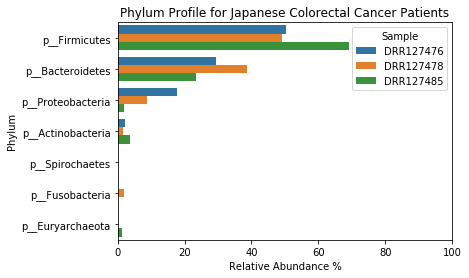

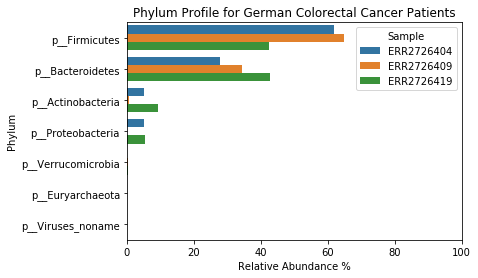

In [5]:
#Plot Phylum level data 

#Start by locating the data where only phylum level information is available
phylum = Normal_profile.loc[(Normal_profile['Phylum'].notna()) & (Normal_profile['Class'].isna())]
sns.barplot(x='Metaphlan2_Analysis', y='Phylum', hue='Sample', data=phylum)
plt.xlim(0, 100)
plt.xlabel("Relative Abundance %")
plt.title("Phylum Profile for Healthy Patients")
plt.show()

phylum = CRCJ_profile.loc[(CRCJ_profile['Phylum'].notna()) & (CRCJ_profile['Class'].isna())]
sns.barplot(x='Metaphlan2_Analysis', y='Phylum', hue='Sample', data=phylum)
plt.xlim(0, 100)
plt.xlabel("Relative Abundance %")
plt.title("Phylum Profile for Japanese Colorectal Cancer Patients")
plt.show()

phylum = CRC_profile.loc[(CRC_profile['Phylum'].notna()) & (CRC_profile['Class'].isna())]
sns.barplot(x='Metaphlan2_Analysis', y='Phylum', hue='Sample', data=phylum)
plt.xlim(0, 100)
plt.xlabel("Relative Abundance %")
plt.title("Phylum Profile for German Colorectal Cancer Patients")
plt.show()

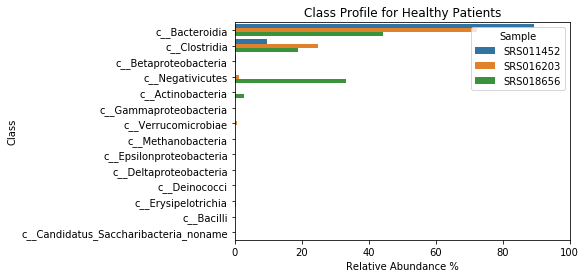

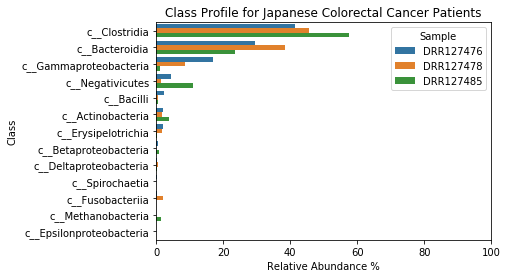

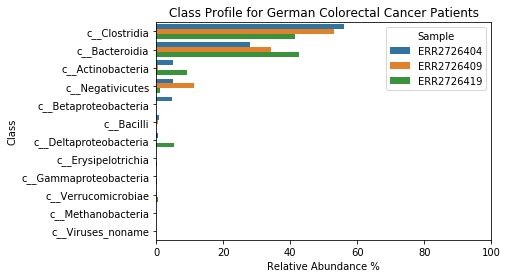

In [6]:
#Plot Class level data

#Start by locating the data where only class level information is available
Class = Normal_profile.loc[(Normal_profile['Class'].notna()) & (Normal_profile['Order'].isna())]
sns.barplot(x='Metaphlan2_Analysis', y='Class', hue='Sample', data=Class)
plt.xlim(0, 100)
plt.xlabel("Relative Abundance %")
plt.title("Class Profile for Healthy Patients")
plt.show()

Class = CRCJ_profile.loc[(CRCJ_profile['Class'].notna()) & (CRCJ_profile['Order'].isna())]
sns.barplot(x='Metaphlan2_Analysis', y='Class', hue='Sample', data=Class)
plt.xlim(0, 100)
plt.xlabel("Relative Abundance %")
plt.title("Class Profile for Japanese Colorectal Cancer Patients")
plt.show()

Class = CRC_profile.loc[(CRC_profile['Class'].notna()) & (CRC_profile['Order'].isna())]
sns.barplot(x='Metaphlan2_Analysis', y='Class', hue='Sample', data=Class)
plt.xlim(0, 100)
plt.xlabel("Relative Abundance %")
plt.title("Class Profile for German Colorectal Cancer Patients")
plt.show()

## Functional Profiling

In [7]:
#Load data for Healthy patients
Normal = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\Normal\Normal', sep='\t')

Normal.rename(columns = {'# Gene Family':'GeneFamily'}, inplace = True)

#Separate out Genus and Species information from Gene Family information
Normal[['Category','Genus_Species']] = Normal.GeneFamily.str.split("|", expand=True,)
Normal[['Genus', 'Species']] = Normal.Genus_Species.str.split("s__", expand=True,)

#Remove unmapped and ungrouped data
Normal = Normal[2:]

Normal['Healthy_Average'] = (Normal['SRS011452_Abundance_CPM'] + Normal['SRS016203_Abundance_CPM'] + Normal['SRS018656_Abundance_CPM'])/3

Normal.drop(Normal.columns[0:7], axis=1, inplace=True)

#drop redundant breakdown data
Normal = Normal.fillna(value=np.nan)
Normal = Normal.loc[Normal['Genus_Species'].isnull()]
Normal.drop(Normal.columns[1:4], axis=1, inplace=True)

Normal.head()

,Category,SRS011452_Abundance_CPM,SRS016203_Abundance_CPM,SRS018656_Abundance_CPM,Healthy_Average
17,1.1.1.1: Alcohol dehydrogenase,27.5865,0.0000,0.0000,9.195500
19,1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] re...,96.9480,106.4610,39.1040,80.837667
28,1.1.1.103: L-threonine 3-dehydrogenase,23.7940,52.6535,7.6650,28.037500
34,1.1.1.133: dTDP-4-dehydrorhamnose reductase,54.1835,30.0580,5.0880,29.776500
39,1.1.1.14: L-iditol 2-dehydrogenase,10.9545,21.0955,3.6815,11.910500


In [8]:
#Load data for Japanese CRC patients
CRCJ = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\CRC_J\CRCJ', sep='\t')

CRCJ.rename(columns = {'# Gene Family':'GeneFamily'}, inplace = True)

CRCJ[['Category','Genus_Species']] = CRCJ.GeneFamily.str.split("|", expand=True,)
CRCJ[['Genus', 'Species']] = CRCJ.Genus_Species.str.split("s__", expand=True,)
CRCJ['CRCJ_Average'] = (CRCJ['DRR127476_1_Abundance-CPM'] + CRCJ['DRR127478_1_Abundance-CPM'] + CRCJ['DRR127485_1_Abundance-CPM'])/3

CRCJ = CRCJ[2:]

#drop redundant breakdown data
CRCJ.drop(CRCJ.columns[0], axis=1, inplace=True)
CRCJ = CRCJ.fillna(value=np.nan)
CRCJ = CRCJ.loc[CRCJ['Genus_Species'].isnull()]
CRCJ.drop(CRCJ.columns[4:7], axis=1, inplace=True)

CRCJ.head()

,DRR127476_1_Abundance-CPM,DRR127478_1_Abundance-CPM,DRR127485_1_Abundance-CPM,Category,CRCJ_Average
22,2.220,7.204,0.032,1.1.1.1: Alcohol dehydrogenase,3.152000
27,20.191,18.535,36.672,1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] re...,25.132667
39,5.702,3.254,15.597,1.1.1.103: L-threonine 3-dehydrogenase,8.184333
45,15.327,8.153,9.813,1.1.1.133: dTDP-4-dehydrorhamnose reductase,11.097667
51,2.947,1.756,9.804,1.1.1.14: L-iditol 2-dehydrogenase,4.835667


In [9]:
#Load data for German CRC patients
CRC = pd.read_csv(r'C:\Users\mike1\Documents\MetagenomicsFinal\CRC\CRC', sep='\t')

CRC.rename(columns = {'# Gene Family':'GeneFamily'}, inplace = True)

CRC[['Category','Genus_Species']] = CRC.GeneFamily.str.split("|", expand=True,)
CRC[['Genus', 'Species']] = CRC.Genus_Species.str.split("s__", expand=True,)

#Drop ungrouped and unmapped data
CRC = CRC[2:]

CRC['CRC_Average'] = (CRC['ERR2726404_Abundance_CPM'] + CRC['ERR2726409_Abundance_CPM'] + CRC['ERR2726419_Abundance_CPM'])/3

CRC.drop(CRC.columns[0:7], axis=1, inplace=True)

#drop redundant breakdown data
CRC = CRC.fillna(value=np.nan)
CRC = CRC.loc[CRC['Genus_Species'].isnull()]
CRC.drop(CRC.columns[1:4], axis=1, inplace=True)

CRC.head()

,Category,ERR2726404_Abundance_CPM,ERR2726409_Abundance_CPM,ERR2726419_Abundance_CPM,CRC_Average
20,1.1.1.1: Alcohol dehydrogenase,0.1435,0.9180,0.2140,0.425167
24,1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] re...,111.3445,284.9990,36.2445,144.196000
34,1.1.1.103: L-threonine 3-dehydrogenase,47.0995,61.8290,16.3410,41.756500
40,1.1.1.133: dTDP-4-dehydrorhamnose reductase,36.5895,40.4615,1.0485,26.033167
45,1.1.1.14: L-iditol 2-dehydrogenase,30.7980,39.9510,1.7145,24.154500


In [10]:
#Combine all data into one data frame
Final = pd.merge(CRC, Normal, on='Category', how="outer")
Final = pd.merge(Final, CRCJ, on='Category', how="outer")

#Final differential between different groupings
Final["CRCJ_CRC_Differential"] = (Final['CRC_Average'] - Final['CRCJ_Average']).abs()
Final["Normal_CRCJ_Differential"] = (Final['Healthy_Average'] - Final['CRCJ_Average']).abs()
Final["Normal_CRC_Differential"] = (Final['CRC_Average'] - Final['Healthy_Average']).abs()
Final.head()

,Category,ERR2726404_Abundance_CPM,ERR2726409_Abundance_CPM,ERR2726419_Abundance_CPM,CRC_Average,SRS011452_Abundance_CPM,SRS016203_Abundance_CPM,SRS018656_Abundance_CPM,Healthy_Average,DRR127476_1_Abundance-CPM,DRR127478_1_Abundance-CPM,DRR127485_1_Abundance-CPM,CRCJ_Average,CRCJ_CRC_Differential,Normal_CRCJ_Differential,Normal_CRC_Differential
0,1.1.1.1: Alcohol dehydrogenase,0.1435,0.9180,0.2140,0.425167,27.5865,0.0000,0.0000,9.195500,2.220,7.204,0.032,3.152000,2.726833,6.043500,8.770333
1,1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] re...,111.3445,284.9990,36.2445,144.196000,96.9480,106.4610,39.1040,80.837667,20.191,18.535,36.672,25.132667,119.063333,55.705000,63.358333
2,1.1.1.103: L-threonine 3-dehydrogenase,47.0995,61.8290,16.3410,41.756500,23.7940,52.6535,7.6650,28.037500,5.702,3.254,15.597,8.184333,33.572167,19.853167,13.719000
3,1.1.1.133: dTDP-4-dehydrorhamnose reductase,36.5895,40.4615,1.0485,26.033167,54.1835,30.0580,5.0880,29.776500,15.327,8.153,9.813,11.097667,14.935500,18.678833,3.743333
4,1.1.1.14: L-iditol 2-dehydrogenase,30.7980,39.9510,1.7145,24.154500,10.9545,21.0955,3.6815,11.910500,2.947,1.756,9.804,4.835667,19.318833,7.074833,12.244000


C:\Users\mike1\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


<Figure size 1080x1080 with 0 Axes>

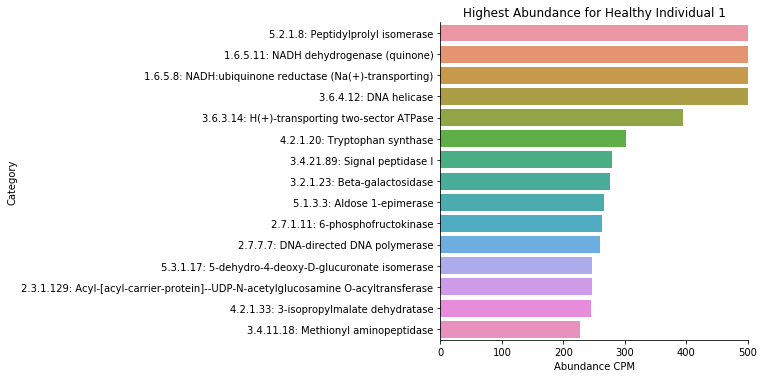

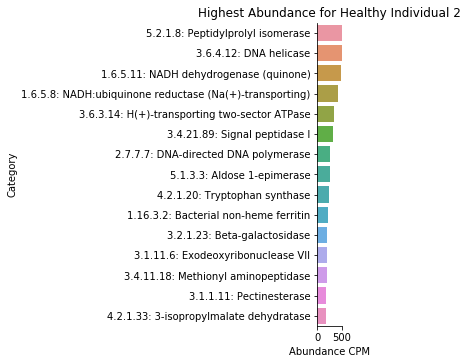

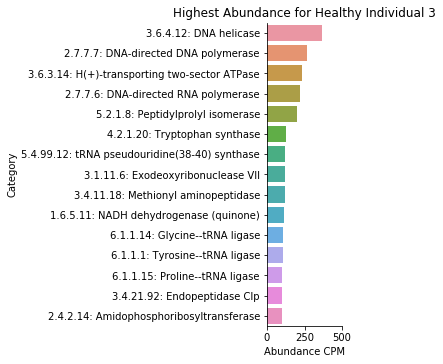

In [11]:
#Plot the 15 most abundant gene families for each healthy individual
plt.figure(figsize=(15, 15))

sns.catplot(x = "SRS011452_Abundance_CPM", y = "Category", kind = 'bar', data = Final.sort_values(by = ['SRS011452_Abundance_CPM'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Highest Abundance for Healthy Individual 1')
plt.show()

sns.catplot(x = "SRS016203_Abundance_CPM", y = "Category", kind = 'bar', data = Final.sort_values(by = ['SRS016203_Abundance_CPM'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Highest Abundance for Healthy Individual 2')
plt.show()

sns.catplot(x = "SRS018656_Abundance_CPM", y = "Category", kind = 'bar', data = Final.sort_values(by = ['SRS018656_Abundance_CPM'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Highest Abundance for Healthy Individual 3')
plt.show()

<Figure size 1080x1080 with 0 Axes>

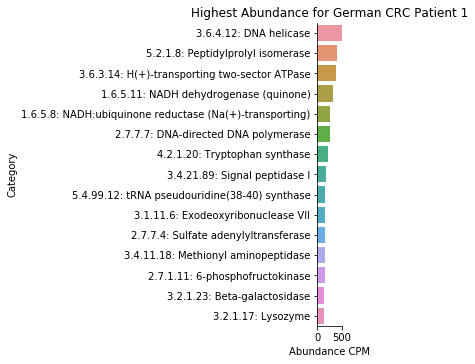

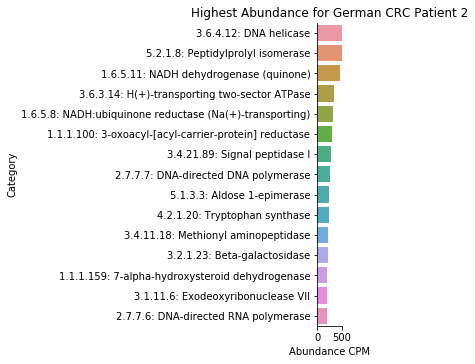

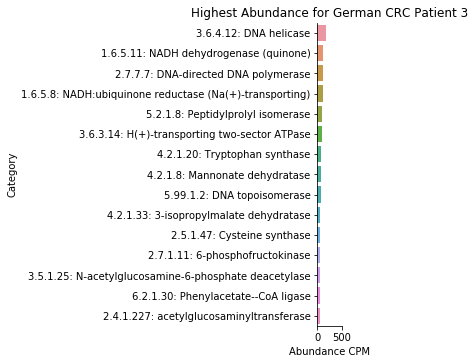

In [12]:
#Plot the 15 most abundant gene families for each German CRC patient
plt.figure(figsize=(15, 15))

sns.catplot(x = "ERR2726404_Abundance_CPM", y = "Category", kind = 'bar', data = Final.sort_values(by = ['ERR2726404_Abundance_CPM'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Highest Abundance for German CRC Patient 1')
plt.show()

sns.catplot(x = "ERR2726409_Abundance_CPM", y = "Category", kind = 'bar', data = Final.sort_values(by = ['ERR2726409_Abundance_CPM'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Highest Abundance for German CRC Patient 2')
plt.show()

sns.catplot(x = "ERR2726419_Abundance_CPM", y = "Category", kind = 'bar', data = Final.sort_values(by = ['ERR2726419_Abundance_CPM'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Highest Abundance for German CRC Patient 3')
plt.show()

C:\Users\mike1\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


<Figure size 1080x1080 with 0 Axes>

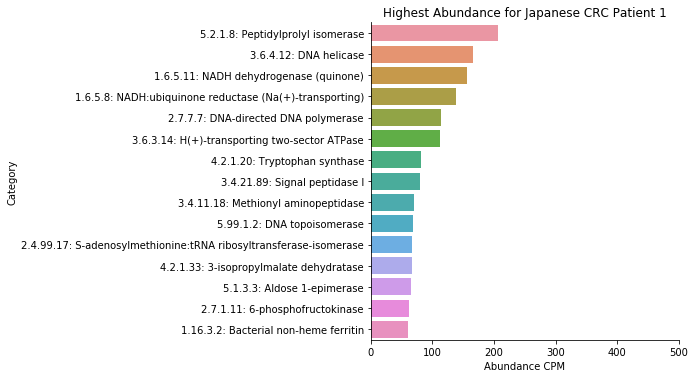

C:\Users\mike1\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


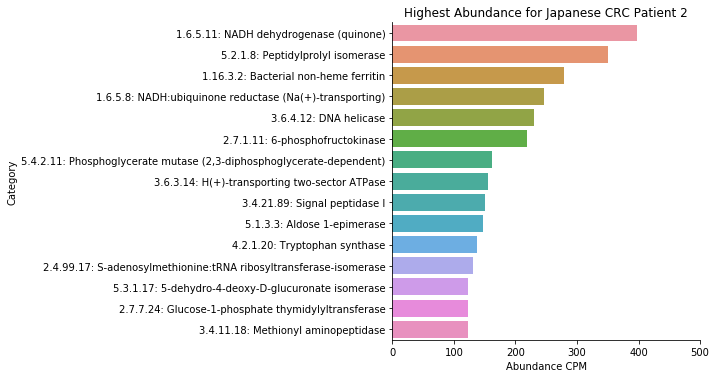

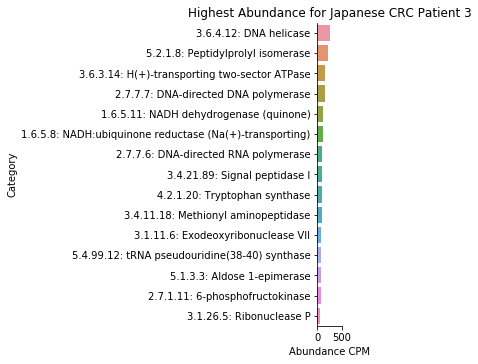

In [13]:
#Plot the 15 most abundant gene families for each Japanese CRC patient
plt.figure(figsize=(15, 15))

sns.catplot(x = "DRR127476_1_Abundance-CPM", y = "Category", kind = 'bar', data = Final.sort_values(by = ['DRR127476_1_Abundance-CPM'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Highest Abundance for Japanese CRC Patient 1')
plt.show()

sns.catplot(x = "DRR127478_1_Abundance-CPM", y = "Category", kind = 'bar', data = Final.sort_values(by = ['DRR127478_1_Abundance-CPM'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Highest Abundance for Japanese CRC Patient 2')
plt.show()

sns.catplot(x = "DRR127485_1_Abundance-CPM", y = "Category", kind = 'bar', data = Final.sort_values(by = ['DRR127485_1_Abundance-CPM'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Highest Abundance for Japanese CRC Patient 3')
plt.show()

<Figure size 1080x1080 with 0 Axes>

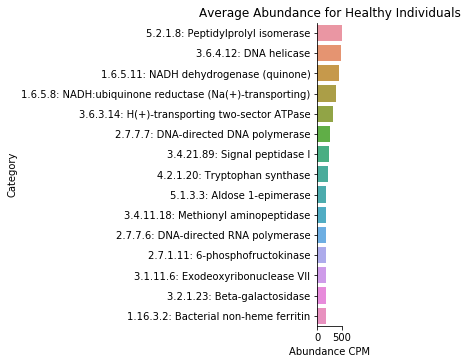

C:\Users\mike1\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


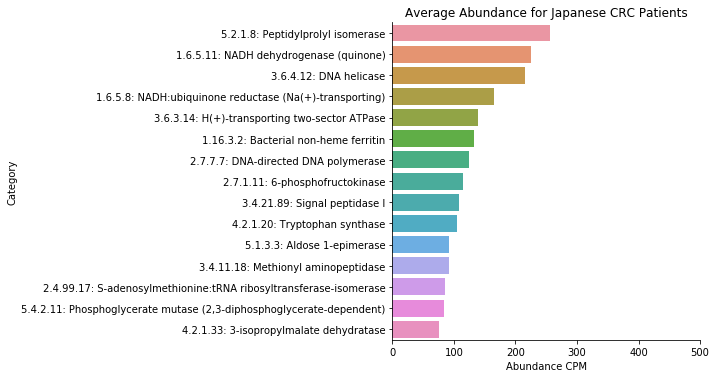

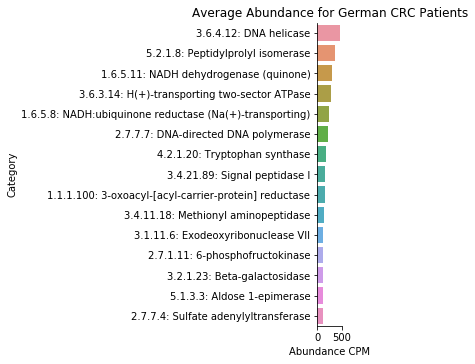

In [14]:
# Plot the average abundance for each group
plt.figure(figsize=(15, 15))

sns.catplot(x = "Healthy_Average", y = "Category", kind = 'bar', data = Normal.sort_values(by = ['Healthy_Average'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Average Abundance for Healthy Individuals')
plt.show()

sns.catplot(x = "CRCJ_Average", y = "Category", kind = 'bar', data = CRCJ.sort_values(by = ['CRCJ_Average'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Average Abundance for Japanese CRC Patients')
plt.show()

sns.catplot(x = "CRC_Average", y = "Category", kind = 'bar', data = CRC.sort_values(by = ['CRC_Average'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Average Abundance for German CRC Patients')
plt.show()

C:\Users\mike1\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


<Figure size 1080x1080 with 0 Axes>

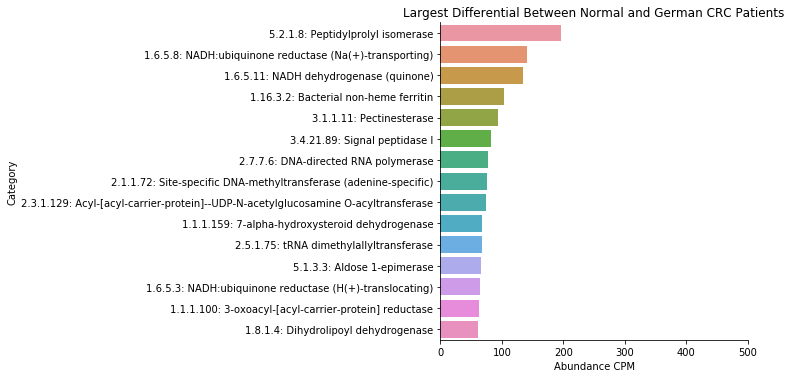

C:\Users\mike1\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


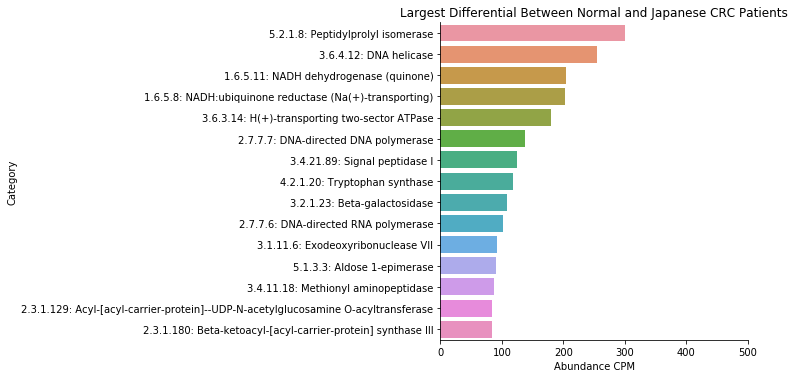

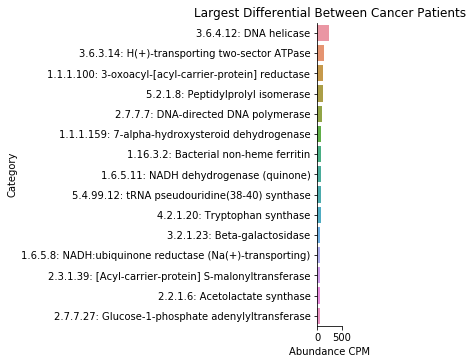

In [15]:
#Plot the differential between each group
plt.figure(figsize=(15, 15))

sns.catplot(x = "Normal_CRC_Differential", y = "Category", kind = 'bar', data = Final.sort_values(by = ['Normal_CRC_Differential'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Largest Differential Between Normal and German CRC Patients')
plt.show()

sns.catplot(x = "Normal_CRCJ_Differential", y = "Category", kind = 'bar', data = Final.sort_values(by = ['Normal_CRCJ_Differential'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Largest Differential Between Normal and Japanese CRC Patients')
plt.show()

sns.catplot(x = "CRCJ_CRC_Differential", y = "Category", kind = 'bar', data = Final.sort_values(by = ['CRCJ_CRC_Differential'], ascending = False, axis = 0).head(15))
plt.xlim(0,500)
plt.xlabel("Abundance CPM")
plt.title('Largest Differential Between Cancer Patients')
plt.show()